# MSPD



Monthly Statement of the Public Debt [MSPD] (https://fiscaldata.treasury.gov/static-data/MSPD_SumSecty_5_years.csv.zip) (USD)

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [4]:
%matplotlib inline

In [5]:
plt.rcParams['figure.figsize'] = (10, 5)

In [6]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [7]:
if os.path.isfile("MSPD_SumSecty_all_years.csv"):
    filepath = "MSPD_SumSecty_all_years.csv"
    print("loading from file")
else:
    filepath = "https://fiscaldata.treasury.gov/static-data/MSPD_SumSecty_5_years.csv.zip"
    print("loading from the internet")

debt_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [18]:
debt_data.head(15)

,Record_Date,Security_Type_Description,Security_Class_Description,Debt_Held_by_the_PublicM,Intragovernmental_HoldingsM,Total_Public_Debt_OutstandingM,Source_Line_Number,Fiscal_Year,Fiscal_Quarter_Number,Calendar_Year,Calendar_Quarter_Number,Calendar_Month_Number,Calendar_Day_Number
0,31/05/2021,Marketable,Bills,4.375781e+06,1.296420e+03,4.377078e+06,1,2021,3,2021,2,5,31
1,31/05/2021,Marketable,Notes,1.182116e+07,9.198022e+03,1.183035e+07,2,2021,3,2021,2,5,31
2,31/05/2021,Marketable,Bonds,3.087149e+06,6.689686e+03,3.093839e+06,3,2021,3,2021,2,5,31
3,31/05/2021,Marketable,Treasury Inflation-Protected Securities,1.584621e+06,7.029200e+02,1.585324e+06,4,2021,3,2021,2,5,31
4,31/05/2021,Marketable,Floating Rate Notes,5.273868e+05,8.244500e+01,5.274693e+05,5,2021,3,2021,2,5,31
5,31/05/2021,Marketable,Federal Financing Bank,0.000000e+00,7.261857e+03,7.261857e+03,6,2021,3,2021,2,5,31
6,31/05/2021,Total Marketable,_,2.139610e+07,2.523135e+04,2.142133e+07,7,2021,3,2021,2,5,31
7,31/05/2021,Nonmarketable,Domestic Series,5.307535e+04,0.000000e+00,5.307535e+04,8,2021,3,2021,2,5,31
8,31/05/2021,Nonmarketable,Foreign Series,2.643420e+02,0.000000e+00,2.643420e+02,9,2021,3,2021,2,5,31
9,31/05/2021,Nonmarketable,State and Local Government Series,1.253390e+05,0.000000e+00,1.253390e+05,10,2021,3,2021,2,5,31


In [19]:
debt_data.columns

Index(['Record_Date', 'Security_Type_Description',
       'Security_Class_Description', 'Debt_Held_by_the_PublicM',
       'Intragovernmental_HoldingsM', 'Total_Public_Debt_OutstandingM',
       'Source_Line_Number', 'Fiscal_Year', 'Fiscal_Quarter_Number',
       'Calendar_Year', 'Calendar_Quarter_Number', 'Calendar_Month_Number',
       'Calendar_Day_Number'],
      dtype='object')

In [20]:
row_one = debt_data.iloc[1]
row_one
#row_two = marketbills_data.iloc[2]
#row_two
#row_three = marketnotes_data.iloc[3]
#row_four = marketbonds_data.iloc[4]
#row_five = markettreasury_data.iloc[5]
#row_six = marketfloating_data.iloc[6]
#row_seven = marketfed_data.iloc[7]
#row_eight = markettotal_data.iloc[8]
#row_nine = nonmarkdomestic_data[9]
#row_ten = nonmarkforeign_data.iloc[10]
#row_eleven = nonmarkstatelocal_data[11]
#row_twelve = nonmarkussavings_data[12]
#row_thirteen = nonmarkgov_data.iloc[13]
#row_fourteen = nonmarkother_data.iloc[14]
#row_fifteen = totalnonmark_data.iloc[15]
#row_sixteen = totalpublic_data.iloc[16]

Record_Date                        31/05/2021
Security_Type_Description          Marketable
Security_Class_Description              Notes
Debt_Held_by_the_PublicM          11821156.92
Intragovernmental_HoldingsM         9198.0221
Total_Public_Debt_OutstandingM    11830354.94
Source_Line_Number                          2
Fiscal_Year                              2021
Fiscal_Quarter_Number                       3
Calendar_Year                            2021
Calendar_Quarter_Number                     2
Calendar_Month_Number                       5
Calendar_Day_Number                        31
Name: 1, dtype: object

In [11]:
row_one["Record_Date"]

'31/05/2021'

In [12]:
row_one.Record_Date

'31/05/2021'

In [13]:
debt_data["Total_Public_Debt_OutstandingM"]


0       4.377078e+06
1       1.183035e+07
2       3.093839e+06
3       1.585324e+06
4       5.274693e+05
            ...     
3750    1.845964e+05
3751    2.348243e+06
3752    3.072795e+03
3753    2.738743e+06
3754    5.716071e+06
Name: Total_Public_Debt_OutstandingM, Length: 3755, dtype: float64

<AxesSubplot:>

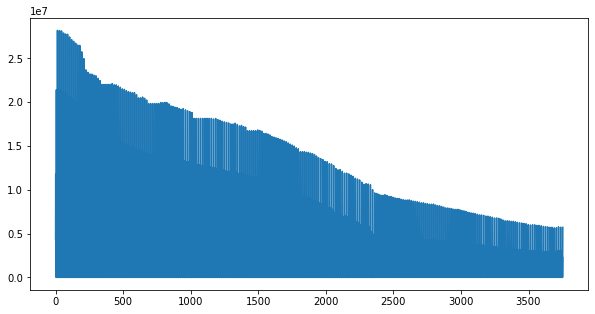

In [14]:
debt_data["Total_Public_Debt_OutstandingM"].plot()

<AxesSubplot:>

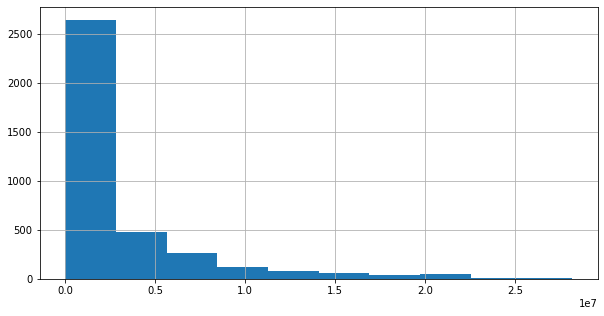

In [15]:
debt_data["Total_Public_Debt_OutstandingM"].hist()

<AxesSubplot:>

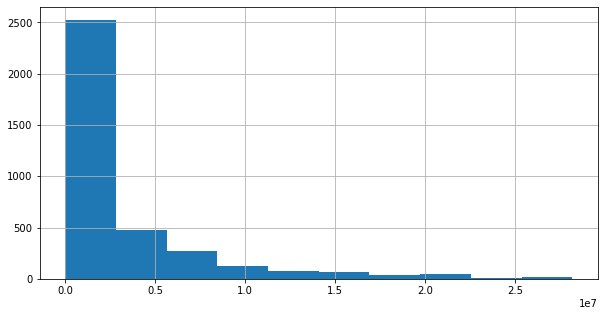

In [16]:
debt_data.Total_Public_Debt_OutstandingM[debt_data.Total_Public_Debt_OutstandingM > 25].hist()

In [38]:
dates = pd.date_range("")

SyntaxError: cannot assign to function call (<ipython-input-38-370435479688>, line 1)